# Лабораторная работа 2. Описательная статистика.
## Титульная информация

Нимеева Ангелина Борисовна, ИСУ 466898, группа J3111

In [ ]:
from copy import deepcopy

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## 1. Выберите два распределения (одно дискретное, другое непрерывное). Сгенерируйте, используя библиотеки, выборку из N = 1000 значений для каждого из распределений.

Распределение Бернулли задаётся по формуле
$$
P(X = k) = p^k(1-p)^(1-k)$$
где $p$ - вероятность, $k$ - возможные результаты.

Нормальное распределение задаётся по формуле
$$
f(x) = \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{(x - \mu)^2}{2\sigma^2}}
$$
где $\mu$ - математическое ожидание, $\sigma$ - стандартное отклонение.

In [ ]:
np.random.seed(2006)
n = 1000

# генерация дискретного распределения (Бернулли)
p_bernoulli = 0.3
bernoulli_data = stats.bernoulli.rvs(p_bernoulli, size=n)

# генерация непрерывного распределения (нормальное)
mu = 0
sigma = 1
normal_data = np.random.normal(mu, sigma, size=n)

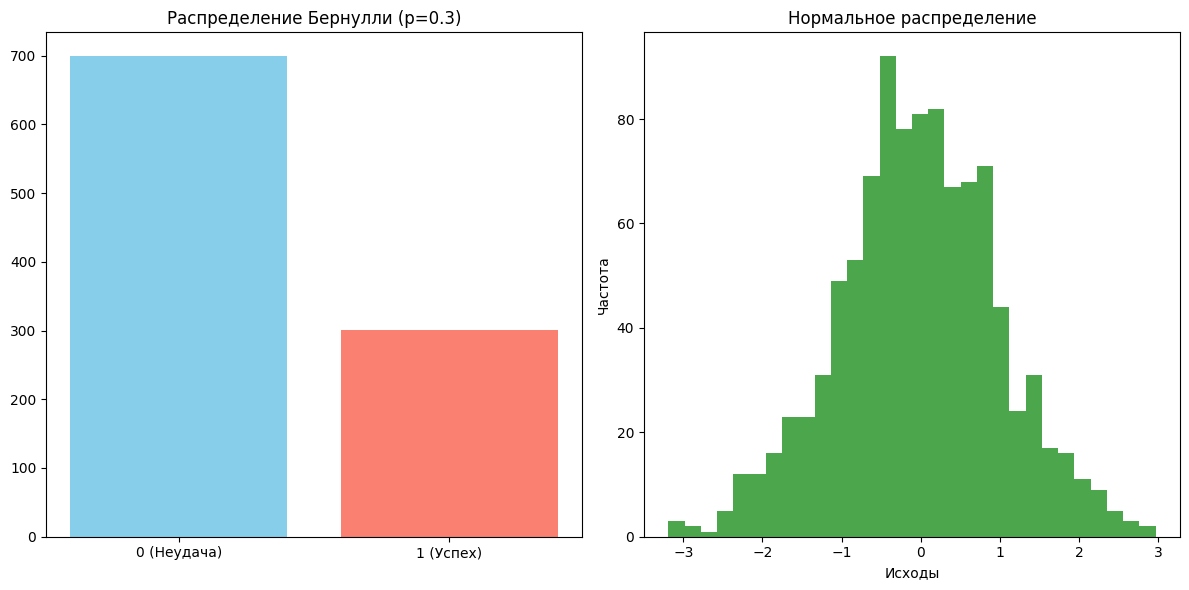

In [ ]:
plt.figure(figsize=(12, 6))

# дискретное распределение (Бернулли)
plt.subplot(1, 2, 1)
plt.bar(['0 (Неудача)', '1 (Успех)'],
        np.bincount(bernoulli_data),
        color=['skyblue', 'salmon'])
plt.title(f'Распределение Бернулли (p={p_bernoulli})')

# непрерывное распределение (нормальное)
plt.subplot(1, 2, 2)
plt.hist(normal_data, bins=30, color='green', alpha=0.7)
plt.title('Нормальное распределение')
plt.xlabel('Исходы')
plt.ylabel('Частота')

plt.tight_layout()
plt.show()

По графикам видно, что распределение Бернулли показывает два чётких исхода: 0 (70%) и 1 (30%), что соответствует заданной нами вероятности, а нормальное распределение почти симметрично. Но заметен большой выброс в районе нуля, который портит симметрию, это связано с малым размером выборки. При увеличении выборки распределение будет более симметричным.

## Для каждой выборки:

## Рассчитайте основные описательные статистики:
* Квартили: Q1, Q2, Q3.
* Меры центральной тенденции: выборочное среднее, медиана, мода.
* Меры вариабельности: размах выборки, интерквартильный размах, дисперсия, стандартное отклонение, коэффициент вариации, среднее абсолютное отклонение.
* Меры формы распределения: коэффициенты асимметрии, эксцесса.
* Первые 5 начальных и центральных моментов (допускается использование смещенных характеристик).


In [ ]:
# Функция для расчета основных описательных статистик
def get_stats(data):
    # Квартили
    Q1 = np.percentile(data, 25)  # 25-й процентиль
    Q2 = np.percentile(data, 50)  # 50-й процентиль (медиана)
    Q3 = np.percentile(data, 75)  # 75-й процентиль
    # Меры центральной тенденции
    mean = np.mean(data)  # выборочное среднее
    median = np.median(data)  # медиана
    mode = stats.mode(data, keepdims=True).mode[0]  # мода
    # Меры вариабельности
    range = np.max(data) - np.min(data)  # размах выборки
    iqr = Q3 - Q1  # интерквартильный размах
    variance = np.var(data)  # дисперсия (смещенная)
    std_dev = np.std(data)  # стандартное отклонение (смещенное)
    cv = std_dev / mean  # коэффициент вариации
    mad = np.mean(np.abs(data - mean))  # среднее абсолютное отклонение
    # Меры формы распределения
    skewness = stats.skew(data)  # коэффициент асимметрии
    kurtosis = stats.kurtosis(data)  # коэффициент эксцесса
    # Первые 5 начальных и центральных моментов
    moments = [np.mean(data), np.var(data), stats.skew(data),
               stats.kurtosis(data),
               np.mean(np.abs(data - mean))]  # первые 5 моментов

    # Создание DataFrame для удобного отображения
    result = pd.DataFrame({
        'Характеристика': ['Q1', 'Q2', 'Q3', 'Выборочное среднее', 'Медиана', 'Мода', 'Размах выборки',
                           'Интерквартильный размах', 'Дисперсия', 'Стандартное отклонение', 'Коэффициент вариации',
                           'Cреднее абсолютное отклонение', 'Коэффициент асимметрии', 'Коэффициент эксцесса',
                           'Первый момент', 'Второй момент', 'Третий момент', 'Четвертый момент', 'Пятый момент'],
        'Значение': [Q1, Q2, Q3, mean, median, mode, range,
                     iqr, variance, std_dev, cv, mad, skewness,
                     kurtosis, moments[0], moments[1], moments[2], moments[3],
                     moments[4]]
    })
    result.set_index('Характеристика', inplace=True)
    return result

# Дискретное распределение (Бернулли)

Основные описательные статистики

In [ ]:
bernoulli_stats = get_stats(bernoulli_data)
bernoulli_stats

,Значение
Характеристика,
Q1,0.000000
Q2,0.000000
Q3,1.000000
Выборочное среднее,0.301000
Медиана,0.000000
Мода,0.000000
Размах выборки,1.000000
Интерквартильный размах,1.000000
Дисперсия,0.210399


Для Бернулли среднее ≈0.3 подтверждает заданную вероятность успеха, а нулевая медиана и мода указывают на преобладание неудач. Низкий размах (0-1) и дисперсия ≈0.2 подчеркивают бинарность данных.

Эмпирическая функция распределения задаётся по формуле
$$
F(x) = P(X \leq x) = \frac{1}{N} \sum_{i=1}^{N} I(X_i \leq x)
$$
где $I(X_i \leq x)$ - индикаторная функция, которая равна 1, если $X_i \leq x$, и 0 в противном случае.

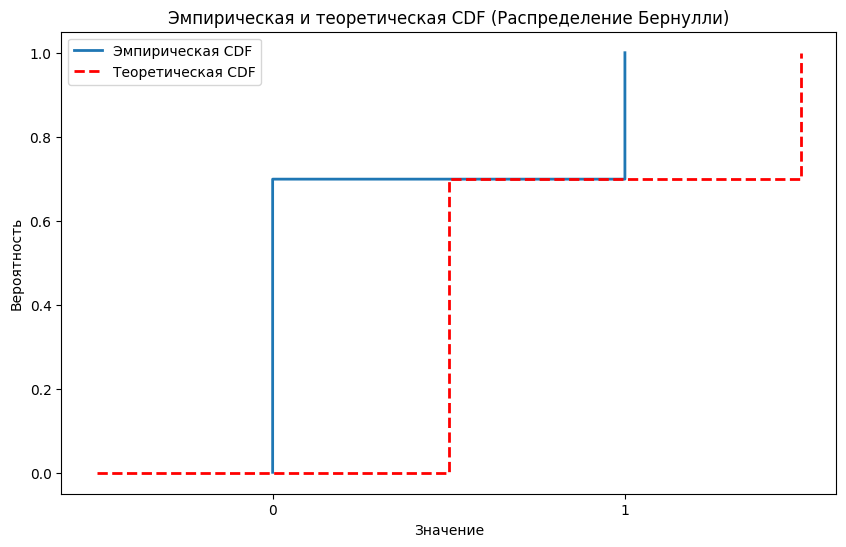

In [ ]:
plt.figure(figsize=(10, 6))

# теоретическая CDF и PMF
x_theor = np.array([-0.5, 0, 0.5, 1, 1.5])
cdf_theor = np.array([0, 0, 1 - p_bernoulli, 1 - p_bernoulli, 1.0])

# эмпирическая CDF
x_sorted = np.sort(bernoulli_data)
ecdf = np.arange(1, len(x_sorted) + 1) / len(x_sorted)
plt.step(x_sorted, ecdf, where='post', label='Эмпирическая CDF', linewidth=2)

# теоретическая CDF
plt.step(x_theor, cdf_theor, where='post', linestyle='--', color='red', label='Теоретическая CDF', linewidth=2)

plt.title('Эмпирическая и теоретическая CDF (Распределение Бернулли)')
plt.xlabel('Значение')
plt.ylabel('Вероятность')
plt.xticks([0, 1])
plt.legend()
plt.show()


По результатам графика видно, что эмпирическая функция распределения совпадает с теоретической. Это говорит о том, что выборка была правильно сгенерирована и соответствует теоретическому распределению.

Эмпирическая функция вероятности задаётся по формуле
$$
P(X = x) = \frac{n_x}{N}
$$
где $n_x$ - количество наблюдений, равных $x$, $N$ - общее количество наблюдений.

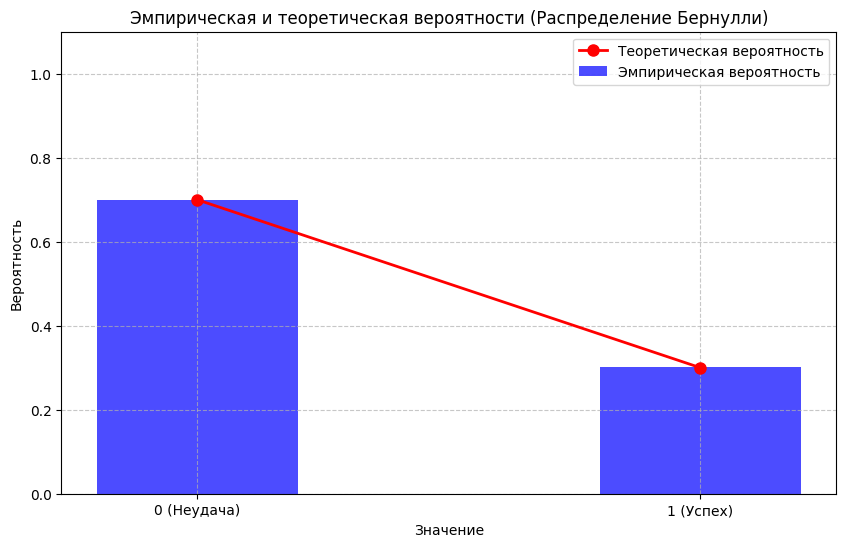

In [ ]:
plt.figure(figsize=(10, 6))

# эмпирическая функция вероятности
x_values = np.array([0, 1])  # Возможные значения для Бернулли
empirical_prob = np.array([(bernoulli_data == x).sum() for x in x_values]) / n
plt.bar(x_values, empirical_prob, width=0.4, label='Эмпирическая вероятность', alpha=0.7, color='blue')

# теоретическая функция вероятности
theoretical_prob = stats.bernoulli.pmf(x_values, p_bernoulli)
plt.plot(x_values, theoretical_prob, 'ro-', label='Теоретическая вероятность', markersize=8, linewidth=2)

plt.title('Эмпирическая и теоретическая вероятности (Распределение Бернулли)')
plt.xlabel('Значение')
plt.ylabel('Вероятность')
plt.xticks(x_values, ['0 (Неудача)', '1 (Успех)'])
plt.ylim(0, 1.1)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Эмпирическая и теоретическая CDF полностью совпадают. Это говорит о том, что все корректно

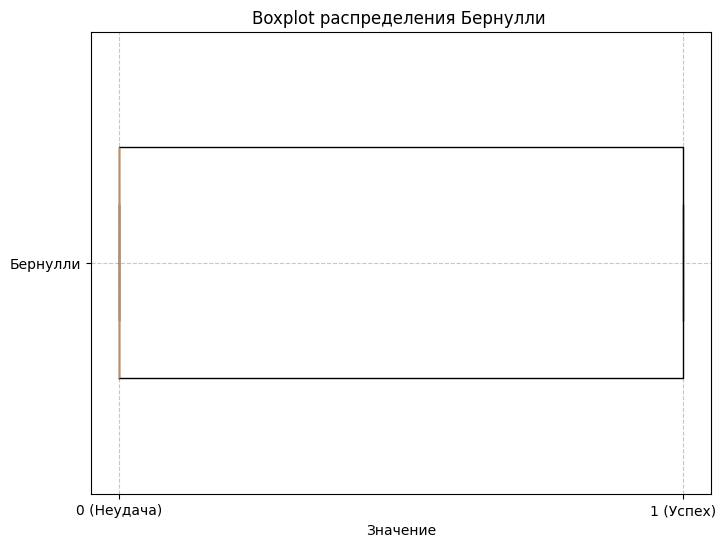

In [ ]:
# построение boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(bernoulli_data, vert=False, widths=0.5)
plt.title('Boxplot распределения Бернулли ')
plt.xlabel('Значение')
plt.yticks([1], ['Бернулли'])
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks([0, 1], ['0 (Неудача)', '1 (Успех)'])
plt.show()

График почти бесполезен, т.к данные бинарны. Медиана сливается с 0, что показывает преобладание нулей (70%)

# Непрерывное распределение (нормальное)

Основные описательные статистики

In [ ]:
normal_stats = get_stats(normal_data)
normal_stats

,Значение
Характеристика,
Q1,-0.654737
Q2,-0.006955
Q3,0.670159
Выборочное среднее,-0.027260
Медиана,-0.006955
Мода,-3.187940
Размах выборки,6.154718
Интерквартильный размах,1.324896
Дисперсия,1.035014


Данные близки к нормальному распределению, но из-за ограниченной выборки наблюдаются небольшие отклонения.

Эмпирическая функция распределения задаётся по формуле
$$
F(x) = P(X \leq x) = \frac{1}{N} \sum_{i=1}^{N} I(X_i \leq x)
$$
где $I(X_i \leq x)$ - индикаторная функция, которая равна 1, если $X_i \leq x$, и 0 в противном случае.

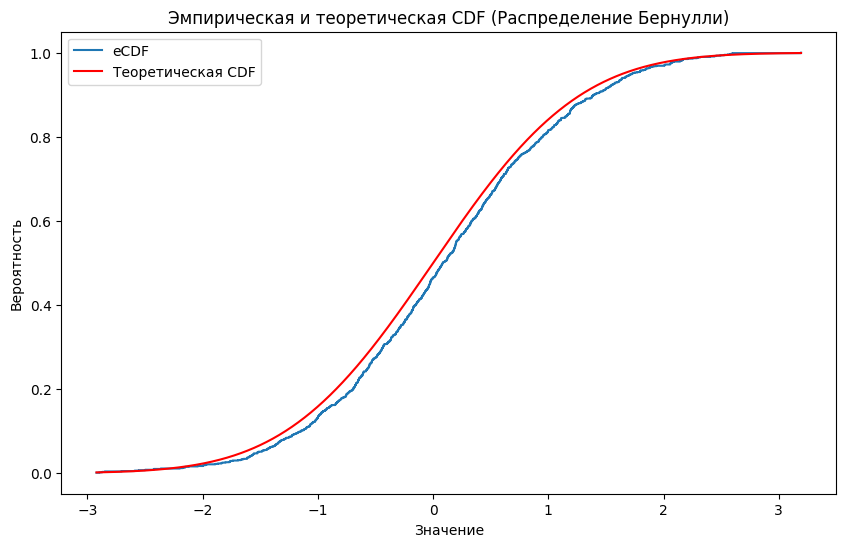

In [ ]:
plt.figure(figsize=(10, 6))

# Эмпирическая функция распределения eCDF
x_normal = np.sort(normal_data)
ecdf_normal = np.arange(1, n + 1) / n
plt.step(x_normal, ecdf_normal, label='eCDF', where='post')

# Теоретическая функция распределения CDF
x = np.linspace(np.min(normal_data), np.max(normal_data), 1000)
theoretical_cdf_normal = stats.norm.cdf(x, mu, sigma)
plt.plot(x, theoretical_cdf_normal, label='Теоретическая CDF', color='red')

plt.title('Эмпирическая и теоретическая CDF (Распределение Бернулли)')
plt.xlabel('Значение')
plt.ylabel('Вероятность')
plt.legend()
plt.show()

По графику видно почти полное совпадение эмпирической функции распределения с теоретической.

Эмпирическая плотность распределения задаётся по формуле
$$
h_j = \frac{ \#\{X_i \in B_j\} }{n \cdot |B_j|}
$$
где $B_j$ - j-й интервал, $|B_j|$ - длина интервала, $\#\{X_i \in B_j\}$ - количество наблюдений в интервале.

Формула Скотта для выбора количества бинов
$$
h = \frac{3.5 \cdot \sigma}{n^{1/3}}
$$
где $h$ - ширина бина, $\sigma$ - стандартное отклонение, $n$ - количество наблюдений.

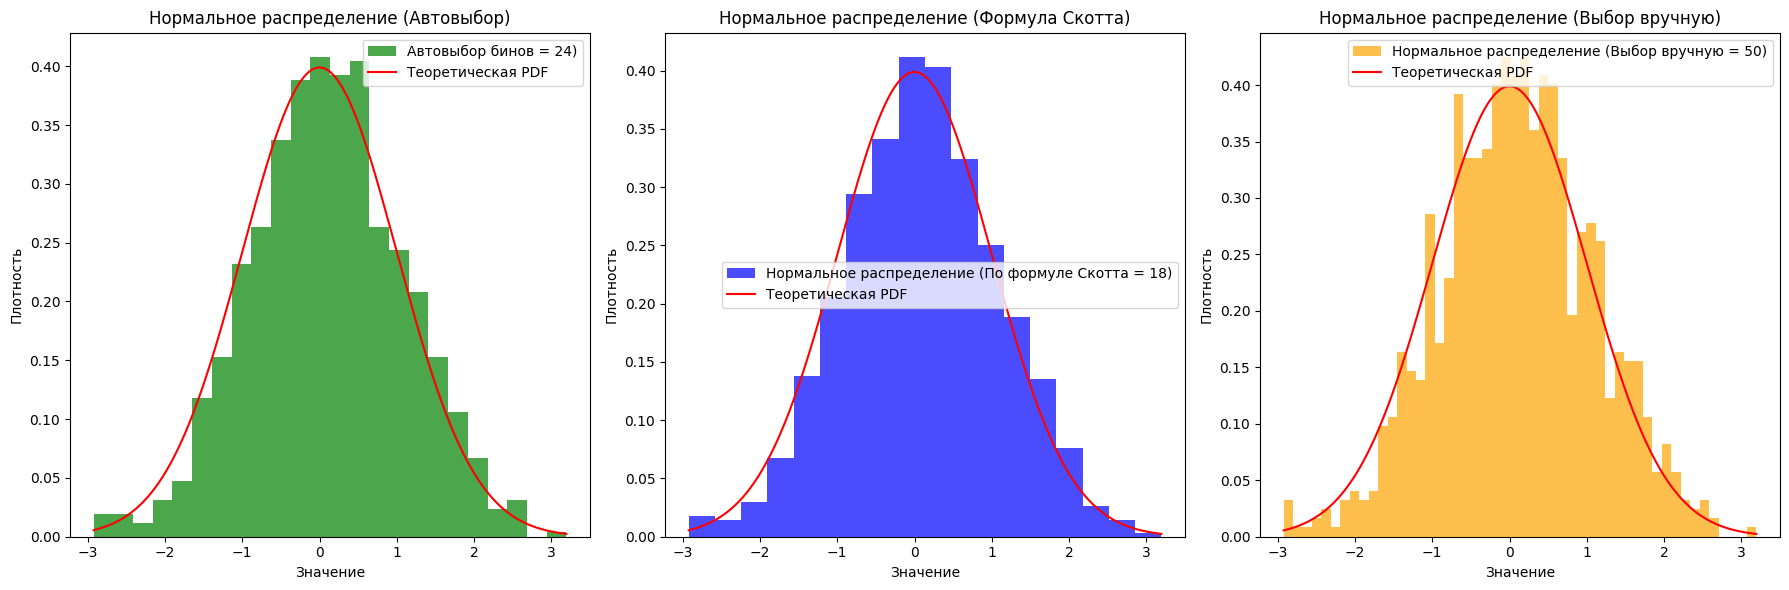

In [ ]:
plt.figure(figsize=(18, 6))


def plot_teoretical_pdf():
    x = np.linspace(np.min(normal_data), np.max(normal_data), 1000)
    theoretical_pdf = stats.norm.pdf(x, mu, sigma)
    plt.plot(x, theoretical_pdf, label='Теоретическая PDF', color='red')


# автоматический выбор количества бинов
plt.subplot(1, 3, 1)
bin_edges_auto = np.histogram_bin_edges(normal_data, bins='auto')  # получение границ бинов
num_bins_auto = len(bin_edges_auto) - 1  # количество бинов
plt.hist(normal_data, bins='auto', density=True, alpha=0.7, color='green',
         label=f'Автовыбор бинов = {num_bins_auto})')
plot_teoretical_pdf()
plt.title('Нормальное распределение (Автовыбор)')
plt.xlabel('Значение')
plt.ylabel('Плотность')
plt.legend()

# выбор количества бинов по формуле Скотта
plt.subplot(1, 3, 2)
num_bins_scott = int(np.ceil((np.max(normal_data) - np.min(normal_data)) / (
        3.5 * normal_stats.loc["Стандартное отклонение"].iloc[0] / (n ** (1 / 3)))))
plt.hist(normal_data, bins=num_bins_scott, density=True, alpha=0.7, color='blue',
         label=f'Нормальное распределение (По формуле Скотта = {num_bins_scott})')
plot_teoretical_pdf()
plt.title('Нормальное распределение (Формула Скотта)')
plt.xlabel('Значение')
plt.ylabel('Плотность')
plt.legend()

# ручной выбор количества бинов
plt.subplot(1, 3, 3)
num_bins_manual = 50
plt.hist(normal_data, bins=num_bins_manual, density=True, alpha=0.7, color='orange',
         label=f'Нормальное распределение (Выбор вручную = {num_bins_manual})')
plot_teoretical_pdf()
plt.title('Нормальное распределение (Выбор вручную)')
plt.xlabel('Значение')
plt.ylabel('Плотность')
plt.legend()

plt.tight_layout()
plt.show()

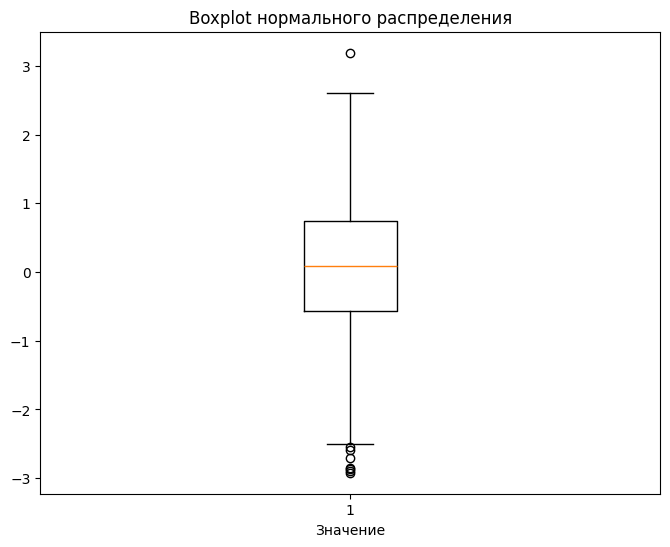

In [ ]:
# построение boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(normal_data)
plt.title('Boxplot нормального распределения')
plt.xlabel('Значение')
plt.show()

График почти симметричен относительно нуля, что соответствует нормальному распределению.

Исследование на устойчивость характеристик

In [ ]:
# выбор величин для выбросов
proportion = np.random.random()  # сколько выбросов будет левее
left_left = np.random.randint(-100, -5)
left_right = np.random.randint(left_left, -5)
right_left = np.random.randint(5, 100)
right_right = np.random.randint(right_left, 100)
print(f'Left outlier range: [{left_left}, {left_right}]')
print(f'Right outlier range: [{right_left}, {right_right}]')
print(f'Left proportion: {proportion * 100:.2f}%')

Left outlier range: [-74, -33]
Right outlier range: [28, 77]
Left proportion: 92.88%


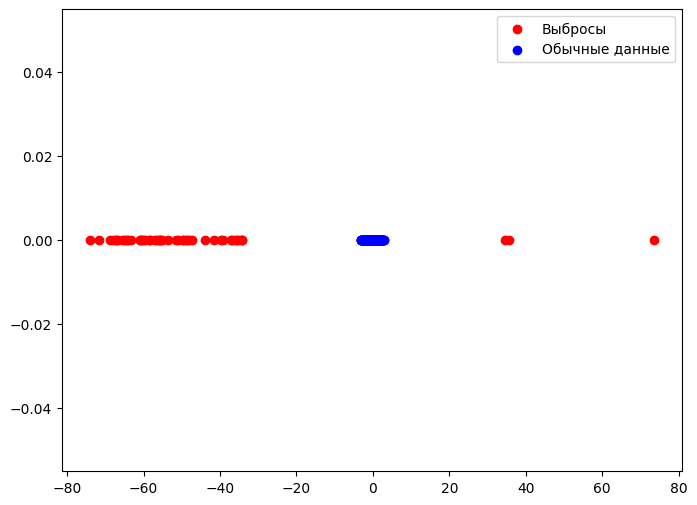

,Без выбросов,С выбросами
,Значение,Значение
Характеристика,,
Q1,-0.654737,-0.767671
Q2,-0.006955,-0.067246
Q3,0.670159,0.635112
Выборочное среднее,-0.027260,-2.230308
Медиана,-0.006955,-0.067246
Мода,-3.187940,-73.964854
Размах выборки,6.154718,147.475897
Интерквартильный размах,1.324896,1.402782


In [ ]:
# добавление выбросов
outliers = np.concat((
    np.random.uniform(low=left_left, high=left_right, size=int(n * proportion * 0.05)),
    np.random.uniform(low=right_left, high=right_right, size=int(n * (1 - proportion) * 0.05))
))
plt.figure(figsize=(8, 6))
plt.scatter(outliers, np.zeros_like(outliers), color='red',
            label=f'Выбросы')
plt.scatter(normal_data, np.zeros_like(normal_data), color='blue', label='Обычные данные')
plt.legend()
plt.show()
with_outliers_stats = get_stats(np.concat((normal_data, outliers)))
result = pd.concat(
    [normal_stats, with_outliers_stats],
    axis=1,
    keys=['Без выбросов', 'С выбросами']
)
result

In [ ]:
# Анализ устойчивости характеристик
outliers_results = (normal_stats.copy())
for persent in range(10, 101, 10):
    outliers = np.random.uniform(low=left_left, high=left_right, size=int(n * proportion * persent / 100))
    outliers = np.concat((
        outliers,
        np.random.uniform(low=right_left, high=right_right, size=int(n * (1 - proportion) * persent / 100))
    ))
    outliers_results[f'Выбросы {persent}%'] = get_stats(np.concat((normal_data, outliers)))
outliers_results

,Значение,Выбросы 10%,Выбросы 20%,Выбросы 30%,Выбросы 40%,Выбросы 50%,Выбросы 60%,Выбросы 70%,Выбросы 80%,Выбросы 90%,Выбросы 100%
Характеристика,,,,,,,,,,,
Q1,-0.654737,-0.891528,-1.242421,-1.777716,-34.544458,-41.397860,-43.621892,-47.802597,-49.725826,-50.322745,-51.991340
Q2,-0.006955,-0.129220,-0.248275,-0.361348,-0.461976,-0.550149,-0.679185,-0.826000,-1.013343,-1.243334,-1.565988
Q3,0.670159,0.590940,0.545577,0.484998,0.433738,0.372493,0.336499,0.281712,0.229899,0.185962,0.142199
Выборочное среднее,-0.027260,-4.138819,-7.542087,-10.488341,-13.064844,-15.434189,-17.186698,-19.075555,-20.533459,-21.572381,-23.048645
Медиана,-0.006955,-0.129220,-0.248275,-0.361348,-0.461976,-0.550149,-0.679185,-0.826000,-1.013343,-1.243334,-1.565988
Мода,-3.187940,-72.830714,-73.969250,-73.956352,-73.970804,-73.970443,-73.937734,-73.994786,-73.915658,-73.988538,-73.765574
Размах выборки,6.154718,147.183429,150.408891,150.898015,147.936997,150.822995,150.049833,150.599421,148.668327,150.531180,150.238119
Интерквартильный размах,1.324896,1.482468,1.787998,2.262714,34.978196,41.770354,43.958391,48.084309,49.955725,50.508707,52.133539
Дисперсия,1.035014,251.172465,424.032922,586.457292,665.449731,773.610147,808.028880,879.066537,913.993658,928.484129,980.213851


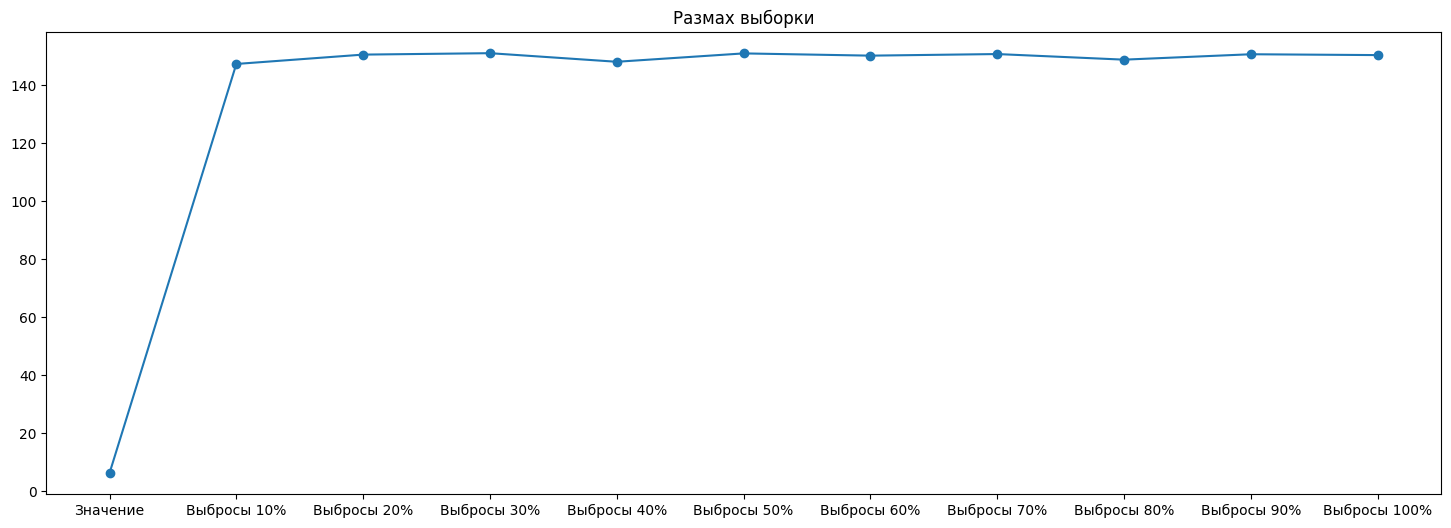

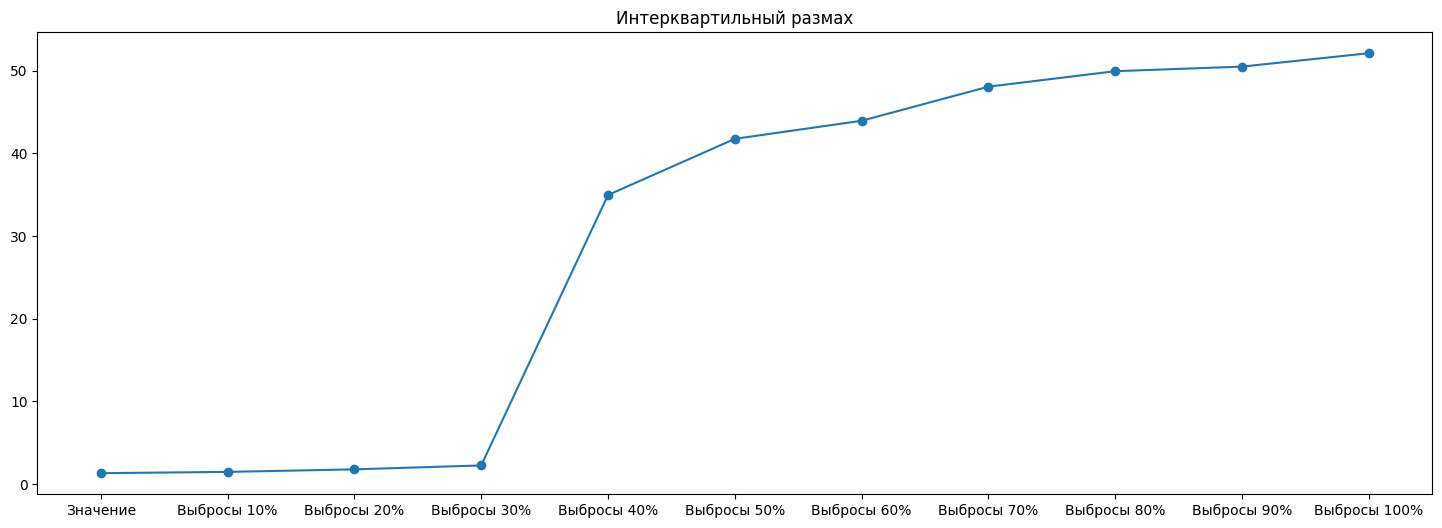

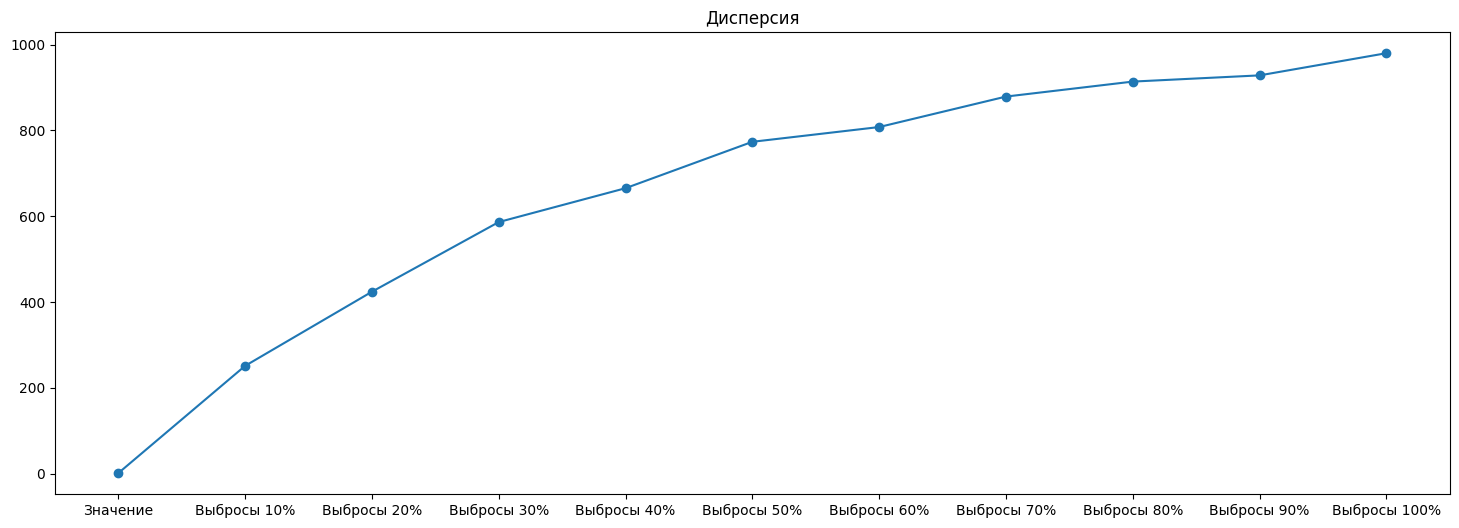

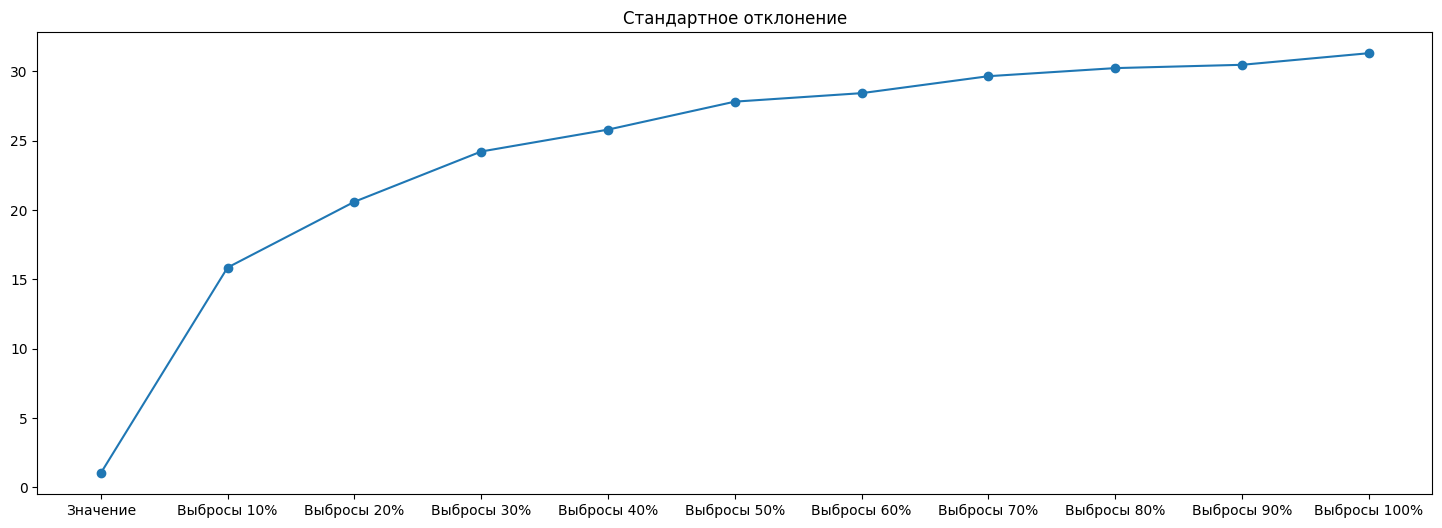

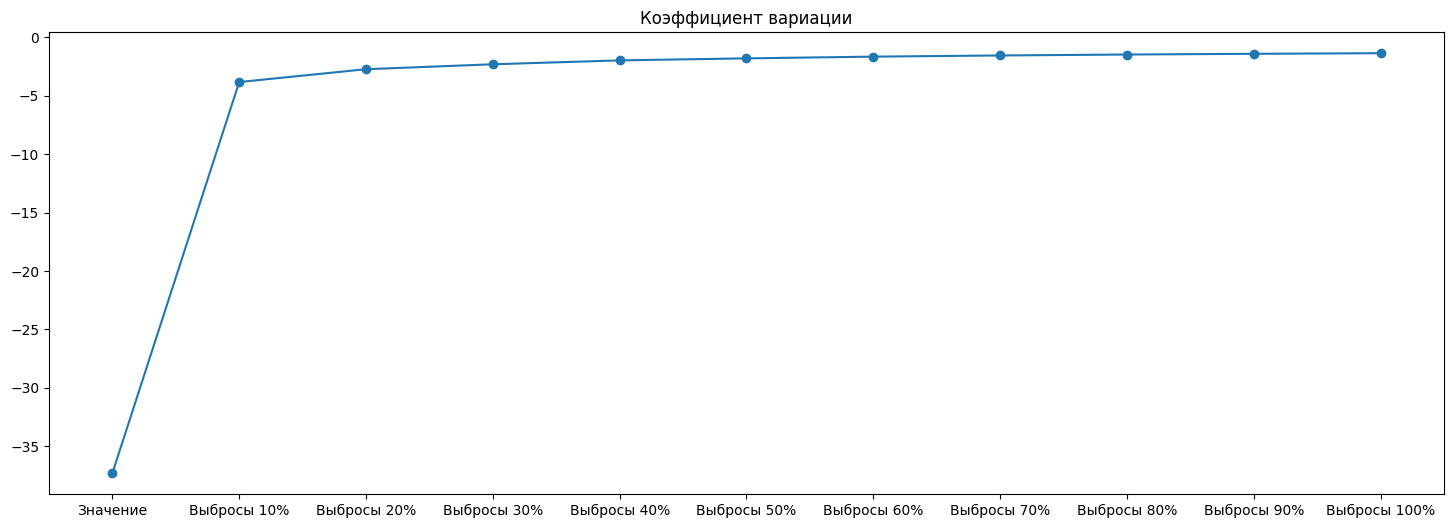

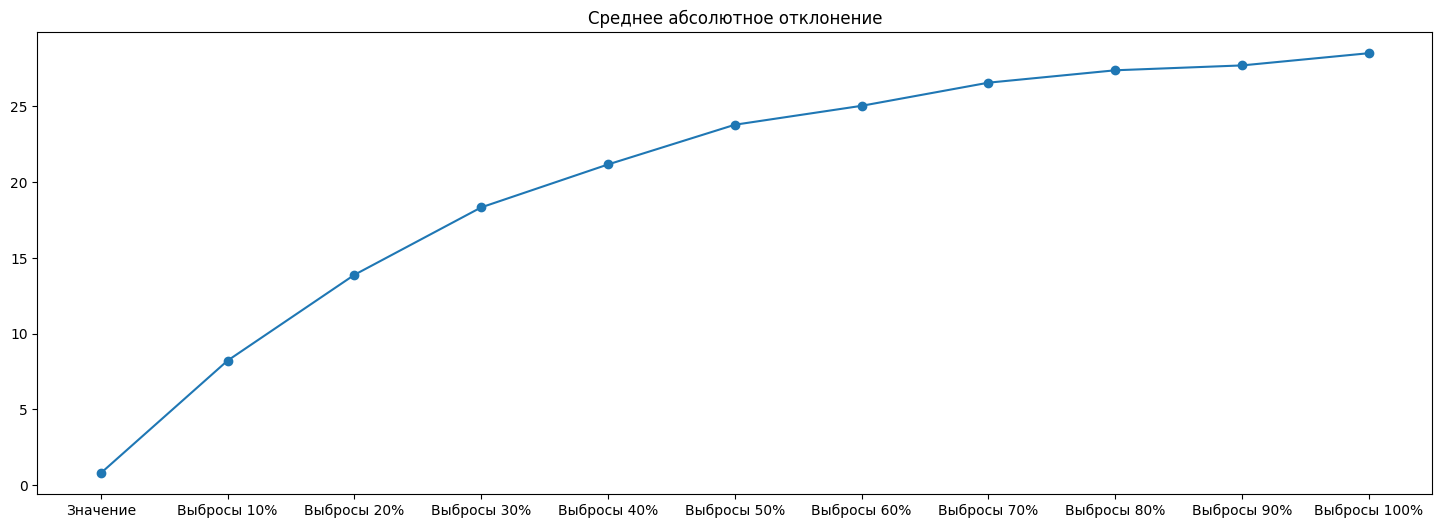

In [ ]:
# График изменения мер вариабельности при добавлении выбросов
plt.figure(figsize=(18, 6))
plt.plot(outliers_results.loc['Размах выборки'], marker='o')
plt.title('Размах выборки')
plt.show()

plt.figure(figsize=(18, 6))
plt.plot(outliers_results.loc['Интерквартильный размах'], marker='o')
plt.title('Интерквартильный размах')
plt.show()

plt.figure(figsize=(18, 6))
plt.plot(outliers_results.loc['Дисперсия'], marker='o')
plt.title('Дисперсия')
plt.show()

plt.figure(figsize=(18, 6))
plt.plot(outliers_results.loc['Стандартное отклонение'], marker='o')
plt.title('Стандартное отклонение')
plt.show()

plt.figure(figsize=(18, 6))
plt.plot(outliers_results.loc['Коэффициент вариации'], marker='o')
plt.title('Коэффициент вариации')
plt.show()

plt.figure(figsize=(18, 6))
plt.plot(outliers_results.loc['Cреднее абсолютное отклонение'], marker='o')
plt.title('Среднее абсолютное отклонение')
plt.show()